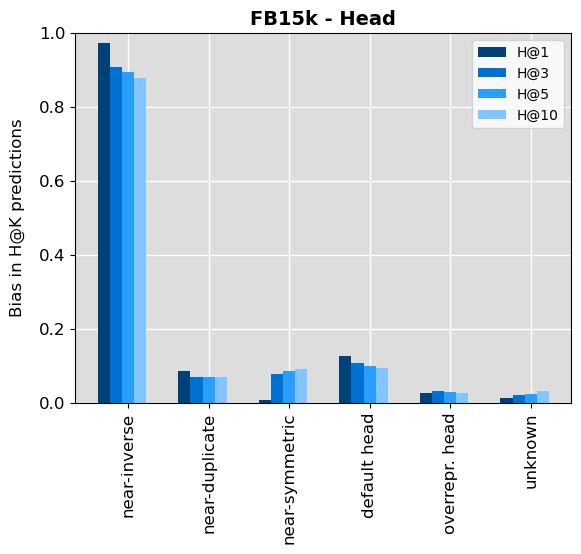

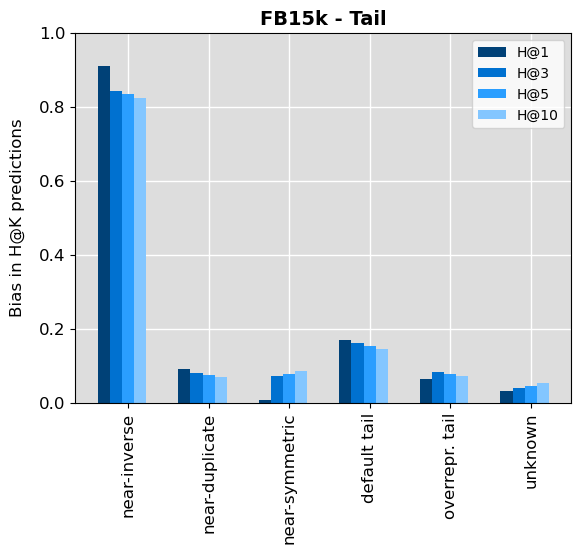

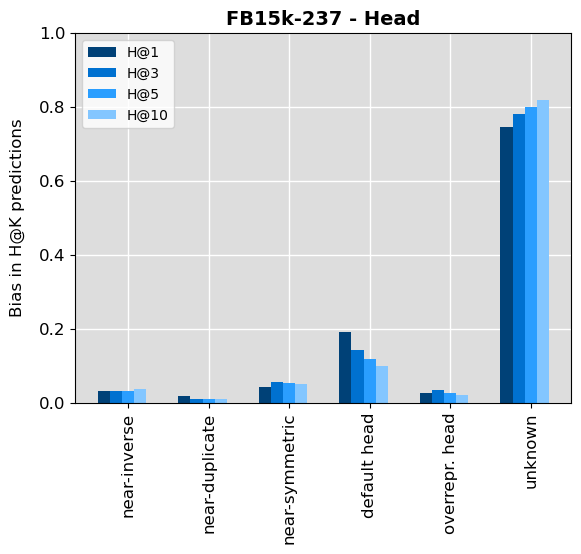

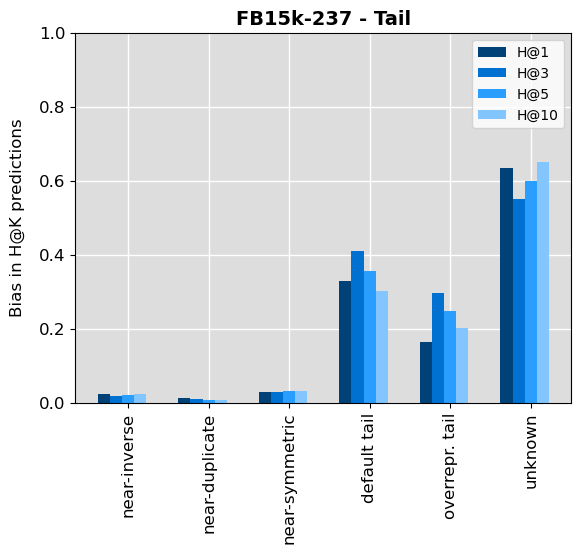

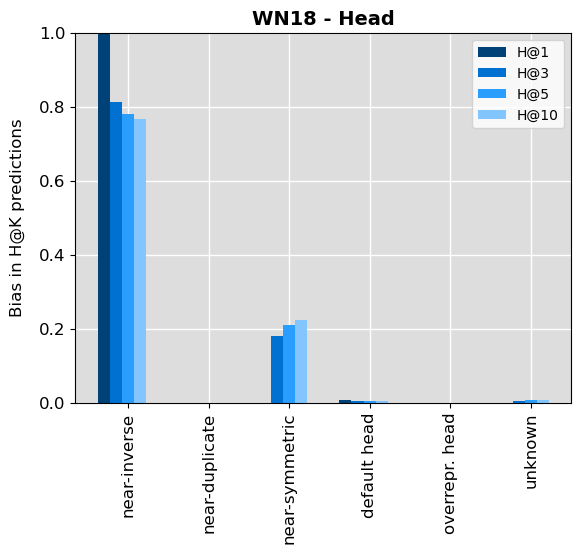

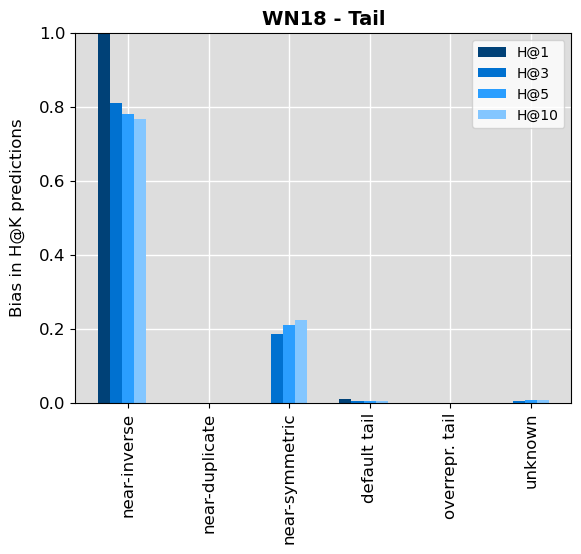

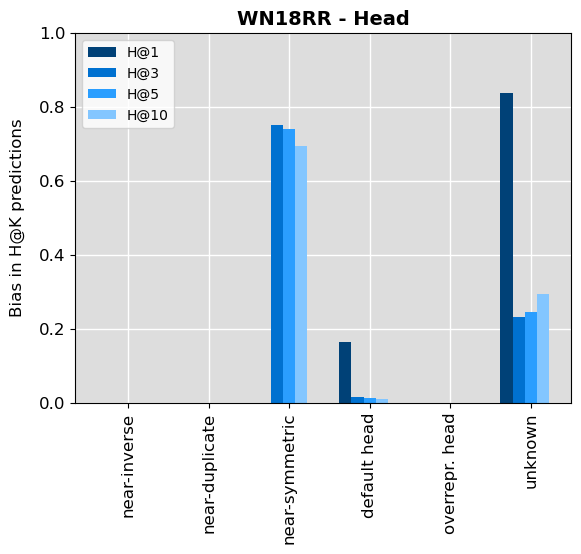

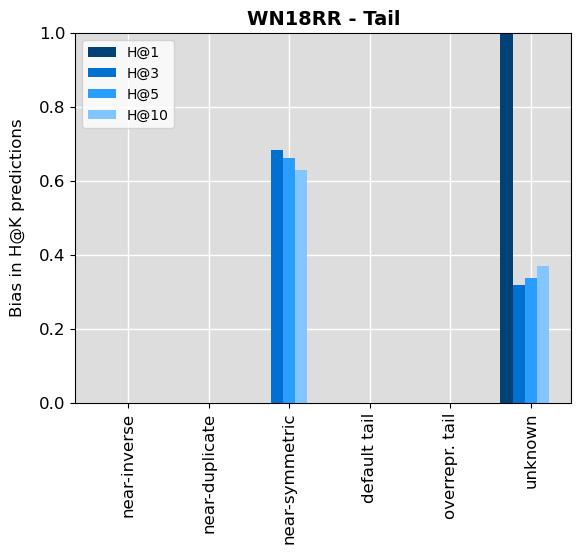

In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import pandas as pd

plt.rcParams['axes.facecolor'] = '#dddddd'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['grid.color'] = "#ffffff"
plt.rcParams['axes.axisbelow'] = True
label_color = '#000000'
primaryColor = '#20639b'
plt.rcParams['text.color'] = label_color
plt.rcParams['axes.labelcolor'] = label_color
plt.rcParams['xtick.color'] = label_color
plt.rcParams['ytick.color'] = label_color

dataset_to_name = {
    "fb15k" : "FB15k",
    "fb15k237": "FB15k-237",
    "wn18": "WN18",
    "wn18rr": "WN18RR"
}

triple_stats = pd.read_csv(os.getcwd() + "/data/split_statistics/triples.csv")
test_triple_count = {dataset: triple_stats.loc[triple_stats['dataset'] == dataset]["tripleCountTest"].values[0] for dataset in dataset_to_name.values()}


for dataset in "fb15k", "fb15k237", "wn18", "wn18rr":
    for entity_setting in "Head", "Tail":

        labels_mapping = {"inverseAffected" : "near-inverse", "overrepresentedAffected" : "overrepr. " + entity_setting.lower(), 
                            "defaultAffected": "default " + entity_setting.lower(), 
                            "duplicateAffected": "near-duplicate",
                            "symmetryAffected": "near-symmetric",
                            "unknownPredictions": "unknown",
}    
        dataset_name = dataset_to_name[dataset]
        bias_stats = pd.read_csv(os.getcwd() + "/data/predictionAnalysis/{}_{}.csv".format(dataset, entity_setting.lower()))
        bias_types = list(bias_stats)[1:]
        bias_types.remove("correctPredictions")
        biased_triples = {hits_k: [bias_stats.loc[bias_stats['H@K'] == hits_k][biasType].values[0]/bias_stats.loc[bias_stats['H@K'] == hits_k]["correctPredictions"].values[0] for biasType in bias_types] for hits_k in [1, 3, 5, 10]}
        

        x = [labels_mapping[bias] for bias in bias_types]
        ind = np.arange(len(x)) 
        data_at_1 = biased_triples[1]
        data_at_3 = biased_triples[3]
        data_at_5 = biased_triples[5]
        data_at_10 = biased_triples[10]

        width = 0.15
        fig, ax = plt.subplots()
        
        ax.bar(ind - width, data_at_3, width, color="#0071d0",label="H@3")
        ax.bar(ind - 2*width, data_at_1, width, color='#004177', label='H@1')
        ax.bar(ind + width, data_at_10, width, color='#83c6ff', label='H@10')
        ax.bar(x, data_at_5, width, color='#2a9eff', label='H@5')
        ax.set_title(dataset_name + " - " + entity_setting, fontsize=14, fontweight="bold")
        ax.set_ylabel('Bias in H@K predictions', fontsize=12, labelpad=10)
        ax.tick_params(labelbottom=True)
        ax.set_ylim(0, 1.0)

        order = [1,0,3,2]
        # add legend to plot
        handles, labels = plt.gca().get_legend_handles_labels()
        plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], facecolor='white') 

        plt.rc('xtick', labelsize=12)    
        plt.rc('ytick', labelsize=12) 
        plt.xticks(rotation=90)
        plt.savefig("output/prediction_analysis/{}_{}.png".format(dataset, entity_setting.lower()), bbox_inches="tight", dpi=300)
        plt.show()


